In [178]:
! pip install snowflake-connector-python


In [179]:
import snowflake.connector

try:
    # Connect to Snowflake
    conn = snowflake.connector.connect(
        user='NIMESHA',
        password='DATA2024@@data',
        account='FSBMMNF-GF41580',
        warehouse='COMPUTE_WH',
        database='ASSIGNMENT',
        schema='STARSCHEMA',
        role = "ACCOUNTADMIN"
    )

    # Print success message if connected
    print("✅ Successfully connected to Snowflake!")

except Exception as e:
    print("❌ Failed to connect to Snowflake.")
    print("Error:", e)


✅ Successfully connected to Snowflake!


In [180]:

cursor = conn.cursor()

query = """
    SELECT
        OrderID,
        Sales,
        Profit,
        IsShippingDelayed
    FROM FACTSALES

    """

cursor.execute(query)

    # Fetch results into a Pandas DataFrame
df = cursor.fetch_pandas_all()

print("✅ Query executed. Here's a preview:")
print(df.head())



✅ Query executed. Here's a preview:
          ORDERID  SALES  PROFIT  ISSHIPPINGDELAYED
0  CA-2011-103800   16.0     6.0              False
1  CA-2011-112326   12.0     4.0              False
2  CA-2011-112326    4.0    -5.0              False
3  CA-2011-112326  273.0   -65.0              False
4  CA-2011-141817   20.0     5.0               True


In [181]:
df.shape

(9993, 4)

In [182]:
! pip install pymysql

In [183]:

import pandas as pd

# Create a cursor
cursor = conn.cursor()

# Define the query
query1 = """
    SELECT
    OrderID,
    ProductID,
    CustomerID,
    LocationID,
    DateKey,
    Sales,
    ShipID,
    Profit,
    Quantity,
    Discount,
    ProfitRatio,
    SalesaboveTarget,
    OrderProfitable,
    IsShippingDelayed,
    SalesForecast,
    MonthsBetweenOrderAndShip,
    DaysBetweenOrderAndShip,
    FROM FactSales;

"""

# Execute and fetch
cursor.execute(query1)
data_fetch = cursor.fetchall()
df1 = pd.DataFrame(data_fetch)


df1.columns = [
    'Order_ID', 'Product_ID', 'Customer_ID', 'Location_ID', 'DateKey',
    'Sales', 'ShipID', 'Profit', 'Quantity', 'Discount',
    'ProfitRatio', 'SalesaboveTarget', 'OrderProfitable', 'IsShippingDelayed',
    'SalesForecast', 'MonthsBetweenOrderAndShip', 'DaysBetweenOrderAndShip'
]



print("✅ Query executed.")
print(df1.head())


✅ Query executed.
         Order_ID Product_ID Customer_ID Location_ID     DateKey  Sales  \
0  CA-2011-103800       1078         199         249  2011-01-04   16.0   
1  CA-2011-112326        216         612         389  2011-01-05   12.0   
2  CA-2011-112326        706         612         389  2011-01-05    4.0   
3  CA-2011-112326       1361         612         389  2011-01-05  273.0   
4  CA-2011-141817        249         538         453  2011-01-06   20.0   

   ShipID  Profit  Quantity  Discount  ProfitRatio  SalesaboveTarget  \
0      57     6.0         2       0.2         33.8               6.0   
1     162     4.0         3       0.2         36.3               3.0   
2     162    -5.0         2       0.8       -155.0               1.0   
3     162   -65.0         3       0.2        -23.8              84.0   
4     512     5.0         3       0.2         25.0               6.0   

   OrderProfitable  IsShippingDelayed  SalesForecast  \
0             True              False     

**Salesforecast**

In [184]:
df.shape

(9993, 4)

**Order Profitability t**

In [185]:

import pandas as pd

# Create a cursor
cursor = conn.cursor()

# Define the query
query2 = """
SELECT
    DateKey,
    OrderYear,
    OrderMonth,
    OrderDay,
    ShipYear,
    ShipMonth,
    ShipDay
FROM DimDate;


"""

# Execute and fetch
cursor.execute(query2)
data_fetch = cursor.fetchall()
df2 = pd.DataFrame(data_fetch)


df2.columns = [
    'DateKey','OrderYear','OrderMonth','OrderDay','ShipYear','ShipMonth','ShipDay'
]



print("✅ Query executed.")
print(df2.head())


✅ Query executed.
      DateKey  OrderYear  OrderMonth  OrderDay  ShipYear  ShipMonth  ShipDay
0  2011-01-04       2011           1         4      2011          1        8
1  2011-01-05       2011           1         5      2011          1        9
2  2011-01-05       2011           1         5      2011          1        9
3  2011-01-05       2011           1         5      2011          1        9
4  2011-01-06       2011           1         6      2011          1       13


In [186]:
df2.shape

(9993, 7)

In [187]:

import pandas as pd

# Create a cursor
cursor = conn.cursor()

# Define the query
query3 = """
SELECT
   CustomerID,
   CustomerName,
   Segment
FROM DimCustomer;

"""

# Execute and fetch
cursor.execute(query3)
data_fetch = cursor.fetchall()
df3 = pd.DataFrame(data_fetch)


df3.columns = [
   'CustomerID','CustomerName','Segment'
]



print("✅ Query executed.")
print(df3.head())


✅ Query executed.
  CustomerID   CustomerName      Segment
0        199  Darren Powers     Consumer
1        612  Phillina Ober  Home Office
2        612  Phillina Ober  Home Office
3        612  Phillina Ober  Home Office
4        538     Mick Brown     Consumer


In [188]:

import pandas as pd

# Create a cursor
cursor = conn.cursor()

# Define the query
query4 = """
   SELECT
   ShipID,
   ShipMode,
   ShipStatus
   FROM DimShipping;
"""

# Execute and fetch
cursor.execute(query4)
data_fetch = cursor.fetchall()
df4 = pd.DataFrame(data_fetch)


df4.columns = [
   'ShipID','ShipMode','ShipStatus'
]



print("✅ Query executed.")
print(df4.head())


✅ Query executed.
   ShipID        ShipMode     ShipStatus
0      57  Standard Class  Shipped Early
1     162  Standard Class  Shipped Early
2     162  Standard Class  Shipped Early
3     162  Standard Class  Shipped Early
4     512  Standard Class   Shipped Late


In [189]:

import pandas as pd

# Create a cursor
cursor = conn.cursor()

# Define the query
query5 = """
   SELECT
   LocationID,
   City,
   State,
   Region,
   PostalCode,
   Latitude,
   Longitude
   FROM DimLocation;
"""

# Execute and fetch
cursor.execute(query5)
data_fetch = cursor.fetchall()
df5 = pd.DataFrame(data_fetch)


df5.columns = [
   'LocationID','City','State','Region','PostalCode','Latitude','Longitude'
]



print("✅ Query executed.")
print(df5.head())


✅ Query executed.
  LocationID          City         State   Region PostalCode  Latitude  \
0        249       Houston         Texas  Central      77095   29.8941   
1        389    Naperville      Illinois  Central      60540   41.7662   
2        389    Naperville      Illinois  Central      60540   41.7662   
3        389    Naperville      Illinois  Central      60540   41.7662   
4        453  Philadelphia  Pennsylvania     East      19143   39.9448   

   Longitude  
0   -95.6481  
1   -88.1410  
2   -88.1410  
3   -88.1410  
4   -75.2288  


In [190]:

import pandas as pd

# Create a cursor
cursor = conn.cursor()

# Define the query
query6 = """
   SELECT
   ProductID,
   ProductName,
   Category,
   Sub_Category
   FROM DimProduct;
"""

# Execute and fetch
cursor.execute(query6)
data_fetch = cursor.fetchall()
df6 = pd.DataFrame(data_fetch)


df6.columns = [
   'ProductID','ProductName','Category','Sub_Category'
]


print("✅ Query executed.")
print(df6.head())


✅ Query executed.
  ProductID                                        ProductName  \
0      1078  Message Book, Wirebound, Four 5 1/2 X 4 Forms/...   
1       216                                          Avery 508   
2       706         GBC Standard Plastic Binding Systems Combs   
3      1361                      SAFCO Boltless Steel Shelving   
4       249  Avery Hi-Liter EverBold Pen Style Fluorescent ...   

          Category Sub_Category  
0  Office Supplies        Paper  
1  Office Supplies       Labels  
2  Office Supplies      Binders  
3  Office Supplies      Storage  
4  Office Supplies          Art  


In [191]:
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)
print(df6.columns)


Index(['DateKey', 'OrderYear', 'OrderMonth', 'OrderDay', 'ShipYear',
       'ShipMonth', 'ShipDay'],
      dtype='object')
Index(['CustomerID', 'CustomerName', 'Segment'], dtype='object')
Index(['ShipID', 'ShipMode', 'ShipStatus'], dtype='object')
Index(['LocationID', 'City', 'State', 'Region', 'PostalCode', 'Latitude',
       'Longitude'],
      dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Sub_Category'], dtype='object')


In [192]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(9993, 17)
(9993, 7)
(9993, 3)
(9993, 3)
(9993, 7)
(9993, 4)


In [193]:
df_combined = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
print(df_combined.shape)  # Should be (9993, total_columns)


(9993, 41)


In [194]:
df_combined

,Order_ID,Product_ID,Customer_ID,Location_ID,DateKey,Sales,ShipID,Profit,Quantity,Discount,...,City,State,Region,PostalCode,Latitude,Longitude,ProductID,ProductName,Category,Sub_Category
0,CA-2011-103800,1078,199,249,2011-01-04,16.0,57,6.0,2,0.2,...,Houston,Texas,Central,77095,29.8941,-95.6481,1078,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",Office Supplies,Paper
1,CA-2011-112326,216,612,389,2011-01-05,12.0,162,4.0,3,0.2,...,Naperville,Illinois,Central,60540,41.7662,-88.1410,216,Avery 508,Office Supplies,Labels
2,CA-2011-112326,706,612,389,2011-01-05,4.0,162,-5.0,2,0.8,...,Naperville,Illinois,Central,60540,41.7662,-88.1410,706,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders
3,CA-2011-112326,1361,612,389,2011-01-05,273.0,162,-65.0,3,0.2,...,Naperville,Illinois,Central,60540,41.7662,-88.1410,1361,SAFCO Boltless Steel Shelving,Office Supplies,Storage
4,CA-2011-141817,249,538,453,2011-01-06,20.0,512,5.0,3,0.2,...,Philadelphia,Pennsylvania,East,19143,39.9448,-75.2288,249,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Office Supplies,Art
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2014-115427,412,264,177,2014-12-31,14.0,3098,5.0,2,0.2,...,Fairfield,California,West,94533,38.2671,-122.0357,412,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Office Supplies,Binders
9989,CA-2014-115427,676,264,177,2014-12-31,21.0,3098,6.0,2,0.2,...,Fairfield,California,West,94533,38.2671,-122.0357,676,GBC Binding covers,Office Supplies,Binders
9990,CA-2014-156720,282,371,330,2014-12-31,3.0,3929,-1.0,3,0.2,...,Loveland,Colorado,West,80538,40.4262,-105.0900,282,Bagged Rubber Bands,Office Supplies,Fasteners
9991,CA-2014-143259,1630,590,397,2014-12-31,53.0,3664,20.0,3,0.2,...,New York City,New York,East,10009,40.7262,-73.9796,1630,Wilson Jones Legal Size Ring Binders,Office Supplies,Binders


In [195]:
df_combined.columns

Index(['Order_ID', 'Product_ID', 'Customer_ID', 'Location_ID', 'DateKey',
       'Sales', 'ShipID', 'Profit', 'Quantity', 'Discount', 'ProfitRatio',
       'SalesaboveTarget', 'OrderProfitable', 'IsShippingDelayed',
       'SalesForecast', 'MonthsBetweenOrderAndShip', 'DaysBetweenOrderAndShip',
       'DateKey', 'OrderYear', 'OrderMonth', 'OrderDay', 'ShipYear',
       'ShipMonth', 'ShipDay', 'CustomerID', 'CustomerName', 'Segment',
       'ShipID', 'ShipMode', 'ShipStatus', 'LocationID', 'City', 'State',
       'Region', 'PostalCode', 'Latitude', 'Longitude', 'ProductID',
       'ProductName', 'Category', 'Sub_Category'],
      dtype='object')

In [196]:
df_combined.columns

Index(['Order_ID', 'Product_ID', 'Customer_ID', 'Location_ID', 'DateKey',
       'Sales', 'ShipID', 'Profit', 'Quantity', 'Discount', 'ProfitRatio',
       'SalesaboveTarget', 'OrderProfitable', 'IsShippingDelayed',
       'SalesForecast', 'MonthsBetweenOrderAndShip', 'DaysBetweenOrderAndShip',
       'DateKey', 'OrderYear', 'OrderMonth', 'OrderDay', 'ShipYear',
       'ShipMonth', 'ShipDay', 'CustomerID', 'CustomerName', 'Segment',
       'ShipID', 'ShipMode', 'ShipStatus', 'LocationID', 'City', 'State',
       'Region', 'PostalCode', 'Latitude', 'Longitude', 'ProductID',
       'ProductName', 'Category', 'Sub_Category'],
      dtype='object')

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

**Predict Sales Forecast**

In [213]:
df_combined.columns

Index(['Order_ID', 'Product_ID', 'Customer_ID', 'Location_ID', 'DateKey',
       'Sales', 'ShipID', 'Profit', 'Quantity', 'Discount', 'ProfitRatio',
       'SalesaboveTarget', 'OrderProfitable', 'IsShippingDelayed',
       'SalesForecast', 'MonthsBetweenOrderAndShip', 'DaysBetweenOrderAndShip',
       'DateKey', 'OrderYear', 'OrderMonth', 'OrderDay', 'ShipYear',
       'ShipMonth', 'ShipDay', 'CustomerID', 'CustomerName', 'Segment',
       'ShipID', 'ShipMode', 'ShipStatus', 'LocationID', 'City', 'State',
       'Region', 'PostalCode', 'Latitude', 'Longitude', 'ProductID',
       'ProductName', 'Category', 'Sub_Category'],
      dtype='object')

In [214]:
df_combined.drop(['Order_ID','Product_ID', 'Customer_ID', 'Location_ID','ShipID','DateKey'], axis=1, inplace=True)

In [215]:
df_combined.columns

Index(['Sales', 'Profit', 'Quantity', 'Discount', 'ProfitRatio',
       'SalesaboveTarget', 'OrderProfitable', 'IsShippingDelayed',
       'SalesForecast', 'MonthsBetweenOrderAndShip', 'DaysBetweenOrderAndShip',
       'OrderYear', 'OrderMonth', 'OrderDay', 'ShipYear', 'ShipMonth',
       'ShipDay', 'CustomerID', 'CustomerName', 'Segment', 'ShipMode',
       'ShipStatus', 'LocationID', 'City', 'State', 'Region', 'PostalCode',
       'Latitude', 'Longitude', 'ProductID', 'ProductName', 'Category',
       'Sub_Category'],
      dtype='object')

In [216]:
df_combined.drop(['CustomerID','LocationID','ProductID'], axis=1, inplace=True)

In [217]:
df_combined.columns

Index(['Sales', 'Profit', 'Quantity', 'Discount', 'ProfitRatio',
       'SalesaboveTarget', 'OrderProfitable', 'IsShippingDelayed',
       'SalesForecast', 'MonthsBetweenOrderAndShip', 'DaysBetweenOrderAndShip',
       'OrderYear', 'OrderMonth', 'OrderDay', 'ShipYear', 'ShipMonth',
       'ShipDay', 'CustomerName', 'Segment', 'ShipMode', 'ShipStatus', 'City',
       'State', 'Region', 'PostalCode', 'Latitude', 'Longitude', 'ProductName',
       'Category', 'Sub_Category'],
      dtype='object')

In [218]:
df = df_combined.copy()

In [219]:
df['Region'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [220]:
df.head(3)

,Sales,Profit,Quantity,Discount,ProfitRatio,SalesaboveTarget,OrderProfitable,IsShippingDelayed,SalesForecast,MonthsBetweenOrderAndShip,...,ShipStatus,City,State,Region,PostalCode,Latitude,Longitude,ProductName,Category,Sub_Category
0,16.0,6.0,2,0.2,33.8,6.0,True,False,22,0,...,Shipped Early,Houston,Texas,Central,77095,29.8941,-95.6481,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",Office Supplies,Paper
1,12.0,4.0,3,0.2,36.3,3.0,True,False,15,0,...,Shipped Early,Naperville,Illinois,Central,60540,41.7662,-88.1410,Avery 508,Office Supplies,Labels
2,4.0,-5.0,2,0.8,-155.0,1.0,False,False,5,0,...,Shipped Early,Naperville,Illinois,Central,60540,41.7662,-88.1410,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders


In [221]:


numeric_features = ['Profit', 'MonthsBetweenOrderAndShip', 'DaysBetweenOrderAndShip', 'Quantity',
                    'Latitude', 'Longitude', 'SalesForecast', 'ProfitRatio', 'SalesaboveTarget','OrderYear',
                    'OrderMonth', 'OrderDay','ShipYear', 'ShipMonth', 'ShipDay', 'Sales','Discount','Latitude', 'SalesForecast', 'Longitude']


In [222]:
# Suppose this is your full categorical list including 'ShipStatus'
all_categorical_label_features = ['IsShippingDelayed','ShipMode', 'Category','ShipStatus','Sub_Category','OrderProfitable']
all_categorical_onehot_features = ['Region','Segment', 'State', 'City']

In [223]:
categorical_label_features_1 = [col for col in all_categorical_label_features if col != 'ShipStatus']
categorical_onehot_features_1 = ['Region','Segment', 'State', 'City']

In [224]:
encoded_data = {}

# Step 2: Label encode each categorical feature and store in the dictionary
le = LabelEncoder()
for col in categorical_label_features_1:
    encoded_data[col + '_encoded'] = le.fit_transform(df[col])

# Step 3: Create a new DataFrame from just the encoded features
df_label_encoded_only = pd.DataFrame(encoded_data)

# Step 4: Add back the original 'ShipStatus' column (target variable)
df_label_encoded_only['ShipStatus'] = df['ShipStatus']


In [225]:
df_label_encoded_only.head(3)

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus
0,0,3,1,12,1,Shipped Early
1,0,3,1,10,1,Shipped Early
2,0,3,1,3,0,Shipped Early


In [226]:
df_onehot_encoded = pd.get_dummies(df[categorical_onehot_features_1], drop_first=True)

In [227]:
df_onehot_encoded

,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,City_Wilmington,City_Wilson,City_Woodbury,City_Woodland,City_Woodstock,City_Woonsocket,City_Yonkers,City_York,City_Yucaipa,City_Yuma
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9989,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9991,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [228]:
"""scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[numeric_features])
normalized_df = pd.DataFrame(normalized_data, columns=[col + '_scaled' for col in numeric_features])"""

"scaler = StandardScaler()\nnormalized_data = scaler.fit_transform(df[numeric_features])\nnormalized_df = pd.DataFrame(normalized_data, columns=[col + '_scaled' for col in numeric_features])"

In [229]:
#normalized_df

In [230]:
df_last = pd.concat([df_label_encoded_only, df_onehot_encoded, df[numeric_features]], axis=1)


In [231]:
df_last

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus,Region_East,Region_South,Region_West,Segment_Corporate,...,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,SalesForecast,Longitude
0,0,3,1,12,1,Shipped Early,False,False,False,False,...,1,4,2011,1,8,16.0,0.2,29.8941,22,-95.6481
1,0,3,1,10,1,Shipped Early,False,False,False,False,...,1,5,2011,1,9,12.0,0.2,41.7662,15,-88.1410
2,0,3,1,3,0,Shipped Early,False,False,False,False,...,1,5,2011,1,9,4.0,0.8,41.7662,5,-88.1410
3,0,3,1,14,0,Shipped Early,False,False,False,False,...,1,5,2011,1,9,273.0,0.2,41.7662,357,-88.1410
4,1,3,1,2,1,Shipped Late,True,False,False,False,...,1,6,2011,1,13,20.0,0.2,39.9448,26,-75.2288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,3,1,3,1,Shipped Early,False,False,True,True,...,12,31,2015,1,4,14.0,0.2,38.2671,18,-122.0357
9989,0,3,1,3,1,Shipped Early,False,False,True,True,...,12,31,2015,1,4,21.0,0.2,38.2671,27,-122.0357
9990,0,3,1,8,0,Shipped Early,False,False,True,False,...,12,31,2015,1,4,3.0,0.2,40.4262,4,-105.0900
9991,0,3,1,3,1,Shipped Early,True,False,False,False,...,12,31,2015,1,4,53.0,0.2,40.7262,69,-73.9796


In [232]:
X1 = df_last.drop("ShipStatus", axis=1)   # ✅ CORRECT
y1 = df_last["ShipStatus"]

In [233]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.2,
    random_state=0)

X1_train.shape, X1_test.shape

((7994, 608), (1999, 608))

In [234]:
X1_train.corr()

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office,...,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,SalesForecast,Longitude
IsShippingDelayed_encoded,1.000000,-0.495347,0.004150,-0.004156,0.004851,0.005360,-0.018336,0.016537,0.024248,-0.002466,...,0.023441,-0.010310,0.014674,0.017193,0.000662,0.011921,0.008535,0.005814,0.011930,-0.013175
ShipMode_encoded,-0.495347,1.000000,-0.012563,-0.003088,-0.019409,-0.019770,0.008749,-0.020826,-0.002293,-0.003171,...,-0.015151,0.012893,-0.049073,-0.026756,0.024770,-0.001557,0.002685,0.001070,-0.001558,0.013355
Category_encoded,0.004150,-0.012563,1.000000,-0.075016,0.161210,0.009417,0.002037,-0.007626,-0.000531,0.012266,...,-0.013424,-0.013669,0.000845,-0.010070,0.003699,0.039860,-0.065820,0.002035,0.039840,0.006993
Sub_Category_encoded,-0.004156,-0.003088,-0.075016,1.000000,0.042157,0.003954,-0.005171,0.006160,0.010258,0.009681,...,-0.003037,0.014245,-0.008561,-0.001212,-0.008905,0.060993,-0.160687,0.005823,0.060987,0.000642
OrderProfitable_encoded,0.004851,-0.019409,0.161210,0.042157,1.000000,-0.008842,0.017875,0.155833,0.010315,0.014247,...,0.005735,-0.006505,0.000370,0.014554,-0.013687,-0.016679,-0.724052,0.133899,-0.016700,-0.088023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sales,0.011921,-0.001557,0.039860,0.060993,-0.016679,0.008848,0.012268,-0.003475,-0.001348,0.015491,...,0.005076,0.000632,-0.003126,0.008000,0.007711,1.000000,-0.023161,0.020473,1.000000,0.010908
Discount,0.008535,0.002685,-0.065820,-0.160687,-0.724052,-0.033168,-0.016438,-0.158328,0.012605,-0.016612,...,0.000724,-0.006929,0.005290,-0.007660,0.020627,-0.023161,1.000000,-0.212499,-0.023142,0.072134
Latitude,0.005814,0.001070,0.002035,0.005823,0.133899,0.374520,-0.378373,0.026020,-0.033360,0.035369,...,0.026709,-0.008368,0.028126,0.033234,-0.026540,0.020473,-0.212499,1.000000,0.020471,0.097735
SalesForecast,0.011930,-0.001558,0.039840,0.060987,-0.016700,0.008849,0.012260,-0.003485,-0.001345,0.015492,...,0.005083,0.000634,-0.003132,0.008008,0.007717,1.000000,-0.023142,0.020471,1.000000,0.010915


In [235]:
"""import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#Using Pearson Correlation
plt.figure(figsize=(6,5))
cor = X1_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()"""

'import seaborn as sns\n\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\n#Using Pearson Correlation\nplt.figure(figsize=(6,5))\ncor = X1_train.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)\nplt.show()'

In [236]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [237]:
corr_features = correlation(X1_train, 0.7)
len(set(corr_features))

24

In [238]:
corr_features

{'City_Bangor',
 'City_Cheyenne',
 'City_Chicago',
 'City_Fargo',
 'City_Great Falls',
 'City_New York City',
 'City_Omaha',
 'City_Philadelphia',
 'City_Providence',
 'City_Seattle',
 'City_Sioux Falls',
 'City_Washington',
 'City_Wheeling',
 'DaysBetweenOrderAndShip',
 'Discount',
 'Latitude',
 'Longitude',
 'ProfitRatio',
 'Sales',
 'SalesForecast',
 'SalesaboveTarget',
 'ShipMonth',
 'ShipYear',
 'State_California'}

In [239]:
X1_train = X1_train.drop(corr_features,axis=1)
X1_test = X1_test.drop(corr_features,axis=1)

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


In [241]:
model = RandomForestClassifier(random_state=42)

In [242]:
model.fit(X1_train_scaled, y1_train)

RandomForestClassifier(random_state=42)

In [243]:
importances = model.feature_importances_
feature_names = X1_train.columns
importance_df1 = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df1 = importance_df1.sort_values(by='Importance', ascending=False)

top_n = 100
top_features = importance_df1['Feature'].head(top_n).tolist()
# Step 5: Filter scaled data to top features only
X1_train_selected = pd.DataFrame(X1_train_scaled, columns=feature_names)[top_features]
X1_test_selected = pd.DataFrame(X1_test_scaled, columns=feature_names)[top_features]

# Step 6: Train final model
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X1_train_selected, y1_train)
y1_pred = final_model.predict(X1_test_selected)

In [244]:
print(top_features)

['IsShippingDelayed_encoded', 'ShipMode_encoded', 'OrderDay', 'ShipDay', 'Profit', 'OrderMonth', 'Sub_Category_encoded', 'Quantity', 'OrderYear', 'Category_encoded', 'Segment_Corporate', 'Segment_Home Office', 'MonthsBetweenOrderAndShip', 'OrderProfitable_encoded', 'Region_West', 'State_New York', 'Region_East', 'City_Los Angeles', 'Region_South', 'City_San Francisco', 'State_Illinois', 'State_Washington', 'State_Texas', 'State_Pennsylvania', 'City_San Diego', 'City_Houston', 'State_Michigan', 'State_Ohio', 'City_Columbus', 'City_Dallas', 'City_Jacksonville', 'State_Florida', 'State_Oregon', 'State_North Carolina', 'City_Springfield', 'State_Colorado', 'City_Richmond', 'State_Arizona', 'State_Virginia', 'State_Kentucky', 'City_Newark', 'State_Indiana', 'City_Roseville', 'State_Delaware', 'City_Long Beach', 'City_Aurora', 'State_New Jersey', 'State_Georgia', 'City_Arlington', 'State_Tennessee', 'City_Louisville', 'City_Carrollton', 'State_Massachusetts', 'City_Jackson', 'City_Fresno', '

In [245]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))


0.903951975987994
                 precision    recall  f1-score   support

  Shipped Early       0.85      0.99      0.91      1010
   Shipped Late       1.00      1.00      1.00       511
Shipped On Time       0.96      0.63      0.76       478

       accuracy                           0.90      1999
      macro avg       0.94      0.87      0.89      1999
   weighted avg       0.91      0.90      0.90      1999



In [246]:
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))


Confusion Matrix:
 [[997   0  13]
 [  0 511   0]
 [179   0 299]]


**-------------------------------------------------------------------------------**

In [247]:
encoded_data2 = {}

# Step 2: Label encode each categorical feature and store in the dictionary
le = LabelEncoder()
for col in all_categorical_label_features:
    encoded_data[col + '_encoded'] = le.fit_transform(df[col])

# Step 3: Create a new DataFrame from just the encoded features
df_label_encoded2 = pd.DataFrame(encoded_data)

In [248]:
df_label_encoded2

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded
0,0,3,1,12,1,0
1,0,3,1,10,1,0
2,0,3,1,3,0,0
3,0,3,1,14,0,0
4,1,3,1,2,1,1
...,...,...,...,...,...,...
9988,0,3,1,3,1,0
9989,0,3,1,3,1,0
9990,0,3,1,8,0,0
9991,0,3,1,3,1,0


In [249]:
df_onehot_encoded2 = pd.get_dummies(df[all_categorical_onehot_features], drop_first=True)

In [250]:
df_last2 = pd.concat([df_label_encoded2, df_onehot_encoded2, df[numeric_features]], axis=1)
df_last2.head(3)

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,Region_East,Region_South,Region_West,Segment_Corporate,...,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,SalesForecast,Longitude
0,0,3,1,12,1,0,False,False,False,False,...,1,4,2011,1,8,16.0,0.2,29.8941,22,-95.6481
1,0,3,1,10,1,0,False,False,False,False,...,1,5,2011,1,9,12.0,0.2,41.7662,15,-88.1410
2,0,3,1,3,0,0,False,False,False,False,...,1,5,2011,1,9,4.0,0.8,41.7662,5,-88.1410


In [251]:
df_last2['ShipStatus_encoded']


,ShipStatus_encoded
0,0
1,0
2,0
3,0
4,1
...,...
9988,0
9989,0
9990,0
9991,0


In [252]:
X2 = df_last2.drop("SalesForecast", axis=1)   # ✅ CORRECT
y2 = df_last2["SalesForecast"]

In [253]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.2,
    random_state=0)

X2_train.shape, X2_test.shape

((7994, 607), (1999, 607))

In [254]:
X2_train.corr()

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,Region_East,Region_South,Region_West,Segment_Corporate,...,OrderYear,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,Longitude
IsShippingDelayed_encoded,1.000000,-0.495347,0.004150,-0.004156,0.004851,0.176727,0.005360,-0.018336,0.016537,0.024248,...,0.013223,0.023441,-0.010310,0.014674,0.017193,0.000662,0.011921,0.008535,0.005814,-0.013175
ShipMode_encoded,-0.495347,1.000000,-0.012563,-0.003088,-0.019409,-0.393792,-0.019770,0.008749,-0.020826,-0.002293,...,-0.054995,-0.015151,0.012893,-0.049073,-0.026756,0.024770,-0.001557,0.002685,0.001070,0.013355
Category_encoded,0.004150,-0.012563,1.000000,-0.075016,0.161210,0.019262,0.009417,0.002037,-0.007626,-0.000531,...,0.001998,-0.013424,-0.013669,0.000845,-0.010070,0.003699,0.039860,-0.065820,0.002035,0.006993
Sub_Category_encoded,-0.004156,-0.003088,-0.075016,1.000000,0.042157,0.011883,0.003954,-0.005171,0.006160,0.010258,...,-0.008619,-0.003037,0.014245,-0.008561,-0.001212,-0.008905,0.060993,-0.160687,0.005823,0.000642
OrderProfitable_encoded,0.004851,-0.019409,0.161210,0.042157,1.000000,0.034704,-0.008842,0.017875,0.155833,0.010315,...,0.002483,0.005735,-0.006505,0.000370,0.014554,-0.013687,-0.016679,-0.724052,0.133899,-0.088023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ShipDay,0.000662,0.024770,0.003699,-0.008905,-0.013687,-0.018381,-0.005105,-0.002395,0.016499,0.008668,...,-0.008024,0.000824,0.361472,-0.030860,0.038865,1.000000,0.007711,0.020627,-0.026540,-0.022154
Sales,0.011921,-0.001557,0.039860,0.060993,-0.016679,-0.014234,0.008848,0.012268,-0.003475,-0.001348,...,-0.002223,0.005076,0.000632,-0.003126,0.008000,0.007711,1.000000,-0.023161,0.020473,0.010908
Discount,0.008535,0.002685,-0.065820,-0.160687,-0.724052,-0.031690,-0.033168,-0.016438,-0.158328,0.012605,...,0.003802,0.000724,-0.006929,0.005290,-0.007660,0.020627,-0.023161,1.000000,-0.212499,0.072134
Latitude,0.005814,0.001070,0.002035,0.005823,0.133899,0.023355,0.374520,-0.378373,0.026020,-0.033360,...,0.029530,0.026709,-0.008368,0.028126,0.033234,-0.026540,0.020473,-0.212499,1.000000,0.097735


In [255]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [256]:
corr_features2 = correlation(X2_train, 0.7)
len(set(corr_features2))

22

In [257]:
corr_features2

{'City_Bangor',
 'City_Cheyenne',
 'City_Chicago',
 'City_Fargo',
 'City_Great Falls',
 'City_New York City',
 'City_Omaha',
 'City_Philadelphia',
 'City_Providence',
 'City_Seattle',
 'City_Sioux Falls',
 'City_Washington',
 'City_Wheeling',
 'DaysBetweenOrderAndShip',
 'Discount',
 'Latitude',
 'Longitude',
 'ProfitRatio',
 'Sales',
 'ShipMonth',
 'ShipYear',
 'State_California'}

In [258]:
X2_train.drop(corr_features2,axis=1)
X2_test.drop(corr_features2,axis=1)

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,Region_East,Region_South,Region_West,Segment_Corporate,...,City_Yucaipa,City_Yuma,Profit,MonthsBetweenOrderAndShip,Quantity,SalesaboveTarget,OrderYear,OrderMonth,OrderDay,ShipDay
7472,0,2,1,10,1,0,True,False,False,False,...,False,False,3.0,0,2,2.0,2014,5,13,15
7400,0,3,1,3,0,0,True,False,False,True,...,False,False,-45.0,0,5,20.0,2014,5,4,9
9689,0,3,1,12,1,0,False,False,True,False,...,False,False,13.0,0,5,9.0,2014,12,9,13
799,0,3,1,10,1,2,False,True,False,False,...,False,False,77.0,1,13,50.0,2011,7,26,1
9857,0,1,0,9,1,2,False,False,False,False,...,False,False,7.0,0,2,5.0,2014,12,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,0,3,1,3,1,0,True,False,False,False,...,False,False,71.0,0,9,48.0,2012,7,9,14
5978,0,3,1,12,1,0,False,False,True,False,...,False,False,57.0,0,3,36.0,2013,11,4,9
6084,0,3,1,2,1,0,False,True,False,False,...,False,False,10.0,0,7,13.0,2013,11,11,16
6326,0,3,1,12,1,2,False,False,False,False,...,False,False,17.0,0,4,11.0,2013,12,1,7


In [259]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [260]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [261]:
model.fit(X2_train_scaled, y2_train)

LinearRegression()

In [262]:
y2_pred = model.predict(X2_test_scaled)

In [263]:
# Evaluation metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, y2_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 9.529732347585088e-13
MSE: 4.583221882227616e-24
RMSE: 2.1408460669155118e-12
R² Score: 1.0


**----------------------------------------------------------------------------------**

In [264]:
categorical_label_features3 = [col for col in all_categorical_label_features if col != 'OrderProfitable']

In [265]:
encoded_data3 = {}

# Step 2: Label encode each categorical feature and store in the dictionary
le = LabelEncoder()
for col in categorical_label_features3:
    encoded_data[col + '_encoded'] = le.fit_transform(df[col])

# Step 3: Create a new DataFrame from just the encoded features
df_label_encoded_only3 = pd.DataFrame(encoded_data)

# Step 4: Add back the original 'ShipStatus' column (target variable)
df_label_encoded_only3['OrderProfitable'] = df['OrderProfitable']


In [266]:
df_label_encoded_only3

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,OrderProfitable
0,0,3,1,12,1,0,True
1,0,3,1,10,1,0,True
2,0,3,1,3,0,0,False
3,0,3,1,14,0,0,False
4,1,3,1,2,1,1,True
...,...,...,...,...,...,...,...
9988,0,3,1,3,1,0,True
9989,0,3,1,3,1,0,True
9990,0,3,1,8,0,0,False
9991,0,3,1,3,1,0,True


In [267]:
df_onehot_encoded3 = pd.get_dummies(df[all_categorical_onehot_features], drop_first=True)

In [268]:
df_onehot_encoded3

,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,City_Wilmington,City_Wilson,City_Woodbury,City_Woodland,City_Woodstock,City_Woonsocket,City_Yonkers,City_York,City_Yucaipa,City_Yuma
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9989,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9991,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [269]:
df_last3 = pd.concat([df_label_encoded_only3, df_onehot_encoded3, df[numeric_features]], axis=1)
df_last3.head(3)

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,OrderProfitable,Region_East,Region_South,Region_West,...,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,SalesForecast,Longitude
0,0,3,1,12,1,0,True,False,False,False,...,1,4,2011,1,8,16.0,0.2,29.8941,22,-95.6481
1,0,3,1,10,1,0,True,False,False,False,...,1,5,2011,1,9,12.0,0.2,41.7662,15,-88.1410
2,0,3,1,3,0,0,False,False,False,False,...,1,5,2011,1,9,4.0,0.8,41.7662,5,-88.1410


In [270]:
X3 = df_last3.drop("OrderProfitable", axis=1)   # ✅ CORRECT
y3 = df_last3["OrderProfitable"]

In [271]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    test_size=0.2,
    random_state=0)

X3_train.shape, X3_test.shape

((7994, 609), (1999, 609))

In [272]:
X3_train.corr()

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,Region_East,Region_South,Region_West,Segment_Corporate,...,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,SalesForecast,Longitude
IsShippingDelayed_encoded,1.000000,-0.495347,0.004150,-0.004156,0.004851,0.176727,0.005360,-0.018336,0.016537,0.024248,...,0.023441,-0.010310,0.014674,0.017193,0.000662,0.011921,0.008535,0.005814,0.011930,-0.013175
ShipMode_encoded,-0.495347,1.000000,-0.012563,-0.003088,-0.019409,-0.393792,-0.019770,0.008749,-0.020826,-0.002293,...,-0.015151,0.012893,-0.049073,-0.026756,0.024770,-0.001557,0.002685,0.001070,-0.001558,0.013355
Category_encoded,0.004150,-0.012563,1.000000,-0.075016,0.161210,0.019262,0.009417,0.002037,-0.007626,-0.000531,...,-0.013424,-0.013669,0.000845,-0.010070,0.003699,0.039860,-0.065820,0.002035,0.039840,0.006993
Sub_Category_encoded,-0.004156,-0.003088,-0.075016,1.000000,0.042157,0.011883,0.003954,-0.005171,0.006160,0.010258,...,-0.003037,0.014245,-0.008561,-0.001212,-0.008905,0.060993,-0.160687,0.005823,0.060987,0.000642
OrderProfitable_encoded,0.004851,-0.019409,0.161210,0.042157,1.000000,0.034704,-0.008842,0.017875,0.155833,0.010315,...,0.005735,-0.006505,0.000370,0.014554,-0.013687,-0.016679,-0.724052,0.133899,-0.016700,-0.088023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sales,0.011921,-0.001557,0.039860,0.060993,-0.016679,-0.014234,0.008848,0.012268,-0.003475,-0.001348,...,0.005076,0.000632,-0.003126,0.008000,0.007711,1.000000,-0.023161,0.020473,1.000000,0.010908
Discount,0.008535,0.002685,-0.065820,-0.160687,-0.724052,-0.031690,-0.033168,-0.016438,-0.158328,0.012605,...,0.000724,-0.006929,0.005290,-0.007660,0.020627,-0.023161,1.000000,-0.212499,-0.023142,0.072134
Latitude,0.005814,0.001070,0.002035,0.005823,0.133899,0.023355,0.374520,-0.378373,0.026020,-0.033360,...,0.026709,-0.008368,0.028126,0.033234,-0.026540,0.020473,-0.212499,1.000000,0.020471,0.097735
SalesForecast,0.011930,-0.001558,0.039840,0.060987,-0.016700,-0.014234,0.008849,0.012260,-0.003485,-0.001345,...,0.005083,0.000634,-0.003132,0.008008,0.007717,1.000000,-0.023142,0.020471,1.000000,0.010915


In [273]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [274]:
corr_features3 = correlation(X3_train, 0.7)
len(set(corr_features3))

24

In [275]:
corr_features3

{'City_Bangor',
 'City_Cheyenne',
 'City_Chicago',
 'City_Fargo',
 'City_Great Falls',
 'City_New York City',
 'City_Omaha',
 'City_Philadelphia',
 'City_Providence',
 'City_Seattle',
 'City_Sioux Falls',
 'City_Washington',
 'City_Wheeling',
 'DaysBetweenOrderAndShip',
 'Discount',
 'Latitude',
 'Longitude',
 'ProfitRatio',
 'Sales',
 'SalesForecast',
 'SalesaboveTarget',
 'ShipMonth',
 'ShipYear',
 'State_California'}

In [276]:
X3_train = X3_train.drop(corr_features3,axis=1)
X3_test = X3_test.drop(corr_features3,axis=1)


In [277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

In [278]:
model = RandomForestClassifier(random_state=42)

In [279]:
model.fit(X3_train_scaled, y3_train)

RandomForestClassifier(random_state=42)

In [280]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X3_train, y3_train)
mutual_info


array([2.92017628e-03, 2.32384015e-03, 1.72125302e-02, 9.44149918e-02,
       5.06954055e-01, 8.02345369e-03, 0.00000000e+00, 0.00000000e+00,
       9.20699859e-03, 8.29215130e-04, 0.00000000e+00, 0.00000000e+00,
       3.24439983e-03, 2.22442218e-03, 2.14585261e-03, 6.19254570e-04,
       0.00000000e+00, 7.23118182e-03, 6.70643792e-03, 2.49133287e-03,
       1.05056804e-02, 4.33479765e-03, 5.74673569e-04, 0.00000000e+00,
       9.53030489e-04, 1.14194163e-03, 1.26307415e-03, 1.31706127e-03,
       5.61773065e-03, 8.82639666e-04, 5.43508246e-03, 0.00000000e+00,
       8.06537904e-03, 2.87395695e-03, 0.00000000e+00, 2.29927294e-03,
       0.00000000e+00, 1.26638321e-04, 0.00000000e+00, 1.32830545e-02,
       3.53661802e-03, 0.00000000e+00, 1.35534239e-02, 0.00000000e+00,
       3.91415917e-03, 1.26999168e-02, 1.24403121e-04, 6.42144551e-03,
       2.74634307e-03, 4.54410452e-03, 3.13660558e-02, 0.00000000e+00,
       0.00000000e+00, 1.59362621e-03, 6.65934571e-03, 0.00000000e+00,
      

In [281]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X3_train.columns
mutual_info.sort_values(ascending=False)

,0
OrderProfitable_encoded,0.506954
Profit,0.505828
Sub_Category_encoded,0.094415
State_Texas,0.031366
Category_encoded,0.017213
...,...
City_Medford,0.000000
City_Marysville,0.000000
City_Marlborough,0.000000
City_Marietta,0.000000


In [282]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X3_train, y3_train)
X3_train.columns[sel_five_cols.get_support()]

Index(['Category_encoded', 'Sub_Category_encoded', 'OrderProfitable_encoded',
       'State_Illinois', 'State_New York', 'State_Pennsylvania', 'State_Texas',
       'City_Grove City', 'City_Los Angeles', 'Profit'],
      dtype='object')

In [283]:
# Transform the training and test sets using the selected features
X3_train_selected = sel_five_cols.transform(X3_train)
X3_test_selected = sel_five_cols.transform(X3_test)


In [284]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X3_train_selected, y3_train)


RandomForestClassifier(random_state=42)

In [285]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y3_pred = model.predict(X3_test_selected)

# Print metrics
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       398
        True       1.00      1.00      1.00      1601

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



In [286]:
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred))

Confusion Matrix:
 [[ 398    0]
 [   0 1601]]


In [287]:
#clustering

In [288]:
df_clus = df_last2.copy()

In [289]:
df_clus

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,Region_East,Region_South,Region_West,Segment_Corporate,...,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,SalesForecast,Longitude
0,0,3,1,12,1,0,False,False,False,False,...,1,4,2011,1,8,16.0,0.2,29.8941,22,-95.6481
1,0,3,1,10,1,0,False,False,False,False,...,1,5,2011,1,9,12.0,0.2,41.7662,15,-88.1410
2,0,3,1,3,0,0,False,False,False,False,...,1,5,2011,1,9,4.0,0.8,41.7662,5,-88.1410
3,0,3,1,14,0,0,False,False,False,False,...,1,5,2011,1,9,273.0,0.2,41.7662,357,-88.1410
4,1,3,1,2,1,1,True,False,False,False,...,1,6,2011,1,13,20.0,0.2,39.9448,26,-75.2288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,3,1,3,1,0,False,False,True,True,...,12,31,2015,1,4,14.0,0.2,38.2671,18,-122.0357
9989,0,3,1,3,1,0,False,False,True,True,...,12,31,2015,1,4,21.0,0.2,38.2671,27,-122.0357
9990,0,3,1,8,0,0,False,False,True,False,...,12,31,2015,1,4,3.0,0.2,40.4262,4,-105.0900
9991,0,3,1,3,1,0,True,False,False,False,...,12,31,2015,1,4,53.0,0.2,40.7262,69,-73.9796


In [290]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_clus)


KMeans(n_clusters=3, random_state=0)

In [291]:
kmeans.cluster_centers_

array([[ 2.65010352e-01,  2.21118012e+00,  1.00621118e+00, ...,
         3.84341267e+01,  2.33430642e+03, -9.43777890e+01],
       [ 2.64033702e-01,  2.23601896e+00,  9.69773565e-01, ...,
         3.77523588e+01,  1.76285624e+02, -9.43724652e+01],
       [ 2.66666667e-01,  2.33333333e+00,  1.73333333e+00, ...,
         3.88721667e+01,  1.39018667e+04, -8.67971867e+01]])

In [292]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [293]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [294]:
dict_data = dict(zip(unique, counts))
dict_data

{np.int32(0): np.int64(483),
 np.int32(1): np.int64(9495),
 np.int32(2): np.int64(15)}

In [295]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_clus)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



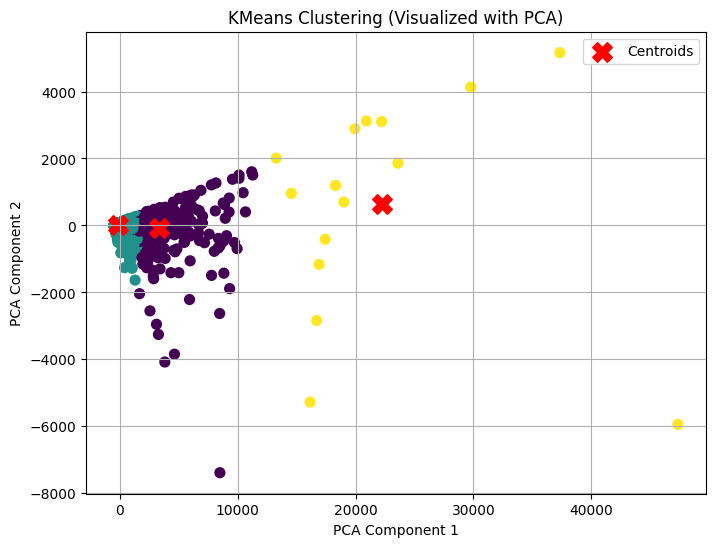

In [296]:

import matplotlib.pyplot as plt
# Step 4: Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)

# Transform original cluster centers to 2D
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('KMeans Clustering (Visualized with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [297]:
kmeans.inertia_

5066029502.784712

In [298]:
k_range = range(1,11)
inertias = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(reduced_data)
    inertias.append(km.inertia_)
y = np.zeros(len(inertias))
inertias

[18136118557.3192,
 9514653435.212461,
 5036587885.537109,
 3200830693.120786,
 2293105085.5887184,
 1616917048.5536506,
 1301793120.514633,
 1051381799.2049638,
 929050277.9630777,
 728132474.216345]

([<matplotlib.axis.XTick at 0x7d402fae7650>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

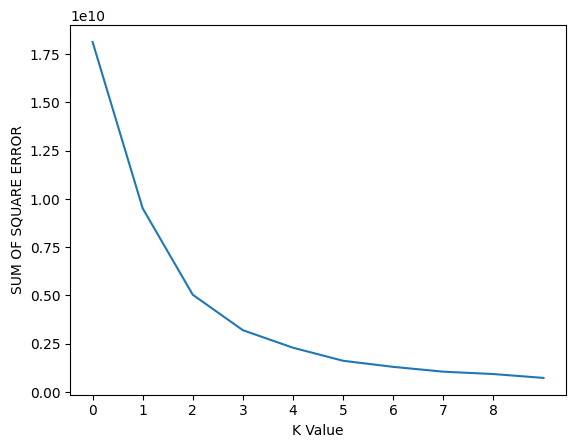

In [299]:
plt.plot(inertias)
plt.xlabel('K Value')
plt.ylabel('SUM OF SQUARE ERROR')
plt.xticks(np.arange(0, 9, 1))

In [300]:
!pip install kneed

In [301]:
from kneed import KneeLocator
kn = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
elbow_point = kn.knee - 1
elbow_point

np.int64(2)

In [302]:
# elbow_point = 3  (for experiment purpose you can change the value of elbow point manually and see the output)
km = KMeans(n_clusters = elbow_point)
y_predicted = km.fit_predict(reduced_data)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [303]:
df_clus['cluster']=y_predicted
df_clus

,IsShippingDelayed_encoded,ShipMode_encoded,Category_encoded,Sub_Category_encoded,OrderProfitable_encoded,ShipStatus_encoded,Region_East,Region_South,Region_West,Segment_Corporate,...,OrderDay,ShipYear,ShipMonth,ShipDay,Sales,Discount,Latitude,SalesForecast,Longitude,cluster
0,0,3,1,12,1,0,False,False,False,False,...,4,2011,1,8,16.0,0.2,29.8941,22,-95.6481,0
1,0,3,1,10,1,0,False,False,False,False,...,5,2011,1,9,12.0,0.2,41.7662,15,-88.1410,0
2,0,3,1,3,0,0,False,False,False,False,...,5,2011,1,9,4.0,0.8,41.7662,5,-88.1410,0
3,0,3,1,14,0,0,False,False,False,False,...,5,2011,1,9,273.0,0.2,41.7662,357,-88.1410,0
4,1,3,1,2,1,1,True,False,False,False,...,6,2011,1,13,20.0,0.2,39.9448,26,-75.2288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,3,1,3,1,0,False,False,True,True,...,31,2015,1,4,14.0,0.2,38.2671,18,-122.0357,0
9989,0,3,1,3,1,0,False,False,True,True,...,31,2015,1,4,21.0,0.2,38.2671,27,-122.0357,0
9990,0,3,1,8,0,0,False,False,True,False,...,31,2015,1,4,3.0,0.2,40.4262,4,-105.0900,0
9991,0,3,1,3,1,0,True,False,False,False,...,31,2015,1,4,53.0,0.2,40.7262,69,-73.9796,0


In [304]:
km.cluster_centers_

array([[-1.04113571e+02, -5.68901932e-01],
       [ 8.28626480e+03,  4.52781707e+01]])

** --------------------------------------------------------------------------------**

In [305]:
import plotly.express as px
# Create the scatter map
sales_region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()

fig1 = px.bar(
    sales_region_segment,
    x='Region',
    y='Sales',
    color='Segment',
    barmode='group',
    title='Total Sales by Region and Segment'
)
fig1.show()

# --------- 2. Total Profit by ShipMode ---------
profit_shipmode = df.groupby('ShipMode')['Profit'].sum().reset_index()

fig2 = px.bar(
    profit_shipmode,
    x='ShipMode',
    y='Profit',
    color='ShipMode',
    title='Total Profit by Ship Mode'
)
fig2.show()

# --------- 3. Count of Delayed Shipments by Region ---------
delays_by_region = df[df['IsShippingDelayed'] == True].groupby('Region').size().reset_index(name='DelayCount')

fig3 = px.bar(
    delays_by_region,
    x='Region',
    y='DelayCount',
    color='Region',
    title='Number of Delayed Shipments by Region'
)
fig3.show()

**-----------------------------------------------------------------------------------**

In [306]:
df = df.dropna(subset=['Latitude', 'Longitude', 'IsShippingDelayed'])

# Filter only delayed shipments
df_delayed = df[df['IsShippingDelayed'] == True]

# Count delays at each (lat, lon)
delay_counts = df_delayed.groupby(['Latitude', 'Longitude', 'City', 'State']).size().reset_index(name='DelayCount')

# Plot delays as bubble map
fig = px.scatter_geo(
    delay_counts,
    lat='Latitude',
    lon='Longitude',
    size='DelayCount',
    hover_name='City',
    hover_data={'State': True, 'DelayCount': True},
    title='Delivery Delay Hotspots by Location',
    color='DelayCount',
    projection='natural earth',
    scope='world'
)
fig.update_layout(geo=dict(showland=True, landcolor='LightGreen'))
fig.show()